In this notebook we are going to understand the behaviour of data and we are going to modify the rows and columns accordingly

In [1]:
# First we are going to read the data from the csv file in which we stored our data

import pandas as pd

perovskite_data = pd.read_csv('MaterialsProject_Perovskite_data.csv')

In [2]:
perovskite_data

,nsites,chemsys,volume,density,density_atomic,energy_per_atom,formation_energy_per_atom,is_stable,band_gap,cbm,...,c,alpha,beta,gamma,element_1,element_2,element_3,atomic_num1,atomic_num2,atomic_num3
0,5,Ac-Al-O,57.451413,8.728230,11.490283,-8.232146,-3.687438,True,4.1024,10.9060,...,3.858634,90.000000,90.000000,90.000000,Ac,Al,O,89,13,8
1,5,Ac-B-O,51.548126,9.206879,10.309625,-21.079046,-2.305889,False,0.8071,7.7035,...,3.721668,90.000000,90.000000,90.000000,Ac,B,O,89,5,8
2,5,Ac-Cr-O,61.362845,8.848788,12.272569,-8.862593,-3.136390,True,2.0031,8.2567,...,3.944272,90.000000,90.000000,90.000000,Ac,Cr,O,89,24,8
3,5,Ac-Cu-O,59.929387,9.380471,11.985877,-21.777599,-2.304353,True,0.0000,NaN,...,3.913331,90.000000,90.000000,90.000000,Ac,Cu,O,89,29,8
4,5,Ac-Fe-O,61.797311,8.889999,12.359462,-8.258555,-2.768958,True,0.9888,7.4875,...,3.953585,90.000092,90.000000,90.000000,Ac,Fe,O,89,26,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,5,C-In-Ti,75.985871,5.909771,15.197174,-7.677729,-0.542866,True,0.0000,NaN,...,4.235561,90.000000,90.000000,90.000000,C,In,Ti,6,49,22
4551,5,In-N-Ti,73.448681,6.159042,14.689736,-7.887028,-0.930243,False,0.0000,NaN,...,4.187884,90.000000,90.000000,90.000000,In,N,Ti,49,7,22
4552,10,O-Pd-Ti,137.324217,6.433494,13.732422,-14.952387,-1.405512,False,0.0000,NaN,...,5.676613,61.007454,89.985037,118.992163,O,Pd,Ti,8,46,22
4553,5,H-Sn-Ti,72.299861,6.047749,14.459972,-13.836890,-0.433977,True,0.0000,NaN,...,4.164999,90.000000,90.000000,90.000000,H,Sn,Ti,1,50,22


In [4]:
# We are going to predict the band gap values using ML right?
# So, the band_gap is our target column
# We will understand how bandgap values change/ behave wrt other columns
# By doing this we can add more better features and remove unnecessary ones

# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
perovskite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        4555 non-null   int64  
 1   chemsys                                       4555 non-null   object 
 2   volume                                        4555 non-null   float64
 3   density                                       4555 non-null   float64
 4   density_atomic                                4555 non-null   float64
 5   energy_per_atom                               4555 non-null   float64
 6   formation_energy_per_atom                     4555 non-null   float64
 7   is_stable                                     4555 non-null   bool   
 8   band_gap                                      4555 non-null   float64
 9   cbm                                           2356 non-null   f

<Axes: xlabel='band_gap', ylabel='Count'>

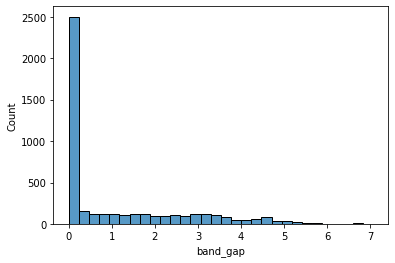

In [6]:
# First we'll see the value counts of our target column.

sns.histplot(data=perovskite_data, x='band_gap')

<Axes: xlabel='band_gap', ylabel='is_metal'>

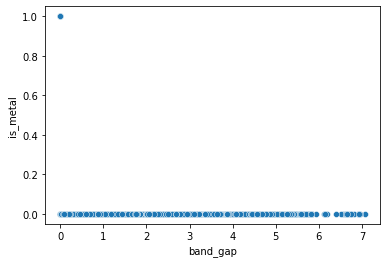

In [9]:
# If we observe the graph, there are many materials whose band_gap is zero
# We generally know that metals have zero band gap
# We are gonna just confirm by plotting bang_gaps with is_metal

sns.scatterplot(data=perovskite_data, y='is_metal', x='band_gap')

In [10]:
# As expected, if the material is metal, its band gap is zero
# So, if we know a material is metal, we won't need any ML model to predict its band_gap
# We can make a separate ML model to predict if the material is metal or not
# For now, we are going to remove the rows where is_metal = True
# This makes our model bit better I assume

perovskite_data = perovskite_data[perovskite_data.is_metal == False].copy()

In [11]:
perovskite_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 0 to 4545
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2222 non-null   int64  
 1   chemsys                                       2222 non-null   object 
 2   volume                                        2222 non-null   float64
 3   density                                       2222 non-null   float64
 4   density_atomic                                2222 non-null   float64
 5   energy_per_atom                               2222 non-null   float64
 6   formation_energy_per_atom                     2222 non-null   float64
 7   is_stable                                     2222 non-null   bool   
 8   band_gap                                      2222 non-null   float64
 9   cbm                                           2222 non-null   float6

In [12]:
# We can see that we removed almost half the data
# Now, we can actually remove the is_metal column as obviously, all the materials are non metals

perovskite_data = perovskite_data.drop(columns=['is_metal'])

In [13]:
perovskite_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2222 entries, 0 to 4545
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        2222 non-null   int64  
 1   chemsys                                       2222 non-null   object 
 2   volume                                        2222 non-null   float64
 3   density                                       2222 non-null   float64
 4   density_atomic                                2222 non-null   float64
 5   energy_per_atom                               2222 non-null   float64
 6   formation_energy_per_atom                     2222 non-null   float64
 7   is_stable                                     2222 non-null   bool   
 8   band_gap                                      2222 non-null   float64
 9   cbm                                           2222 non-null   float6

<Axes: xlabel='band_gap', ylabel='Count'>

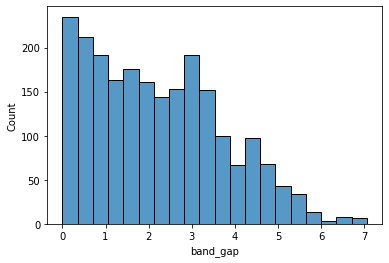

In [14]:
# We have removed that column 
# Now we will see the ranges of the band_gap values 

sns.histplot(data=perovskite_data, x='band_gap')

In [ ]:
# Most of the band_gap values are in the range (0,3.5)
